In [15]:
import mediapipe as mp
import tensorflow as tf
import cv2
import time
import numpy as np
from keras import utils
import numpy as np
import os

In [16]:
import warnings
warnings.filterwarnings("ignore")

The nodes are captured properly so, now I'm going to capture 30 frames per seconds and record a video for 3 secs

So, the Camera is opening successfully so, Now I will try to plot the nodes on my face and hand

In [31]:
# Initialize MediaPipe for face, hand, and pose detection
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Input action from user
action_name = input("Enter the action you want to perform (e.g., wave, hello): ")

# Base directory for images
base_directory = 'Images'
action_folder = os.path.join(base_directory, action_name)

# Check if action folder exists
if not os.path.exists(action_folder):
    os.makedirs(action_folder)
    print(f"Created new action folder: {action_folder}")


# Initialize webcam
cap = cv2.VideoCapture(0)

# Set up the face mesh, hands, and pose solutions
with mp_face_mesh.FaceMesh(max_num_faces=1) as face_mesh, mp_hands.Hands(max_num_hands=2) as hands, mp_pose.Pose() as pose:
    fps = 30  # 30 frames per second
    frame_count = 0
    capture_duration = 3  # Duration in seconds
    frame_interval = 1 / fps  # Interval between frames
    start_time = None

    capturing = False

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a selfie view
        frame = cv2.flip(frame, 1)

        # Convert the image color to RGB as MediaPipe expects RGB input
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the image for face, hands, and pose
        face_results = face_mesh.process(rgb_frame)
        hand_results = hands.process(rgb_frame)
        pose_results = pose.process(rgb_frame)

        # Draw the face landmarks
        if face_results.multi_face_landmarks:
            for face_landmarks in face_results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    frame, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1),
                    mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1))

        # Draw the hand landmarks and label left or right
        if hand_results.multi_hand_landmarks:
            for idx, hand_landmarks in enumerate(hand_results.multi_hand_landmarks):
                # Get handedness label (Left or Right)
                hand_label = hand_results.multi_handedness[idx].classification[0].label

                # Draw landmarks
                mp_drawing.draw_landmarks(
                    frame, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                    mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2))

        # Draw the pose landmarks
        if pose_results.pose_landmarks:
            mp_drawing.draw_landmarks(
                frame, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(255, 0, 255), thickness=2)
            )

        # Display recording start message or prompt message
        if capturing:
            if frame_count < 10:
                if time.time() - start_time <= capture_duration:
                    # Save the frame 
                    img_filename = os.path.join(output_folder, f'frame_{frame_count:03d}.png')
                    cv2.imwrite(img_filename, frame)
                    print(f"Saved {img_filename}")
                    frame_count += 1
                    # Wait to achieve the correct frame rate
                    elapsed_time = time.time() - start_time
                    sleep_time = max(0, frame_interval - elapsed_time % frame_interval)
                    time.sleep(sleep_time)
                else:
                    capturing = False
                    print(f"Captured {frame_count} frames and saved in folder '{output_folder}'")
            else:
                capturing = False
                print(f"Captured {frame_count} frames and saved in folder '{output_folder}'")
        else:
            # Display prompt message to start recording
            cv2.putText(frame, "Press 's' to Start Recording", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Show the image with landmarks
        cv2.imshow('Capturing Videos', frame)

        key = cv2.waitKey(1) & 0xFF     

        if key == ord('s') and not capturing:
            # Start capturing the images
            print("Started capturing the images")
            capturing = True
            start_time = time.time()
            frame_count = 0
            
            # When starting to capture, find the next available dataset folder
            dataset_folders = [f for f in os.listdir(action_folder) if f.startswith('dataset')]
            
            # Extract the numeric part of the folder names
            dataset_nums = [int(f.split('_')[1]) for f in dataset_folders if f.split('_')[1].isdigit()]

            if dataset_nums:
                next_folder_num = max(dataset_nums) + 1  # Continue from the highest numbered dataset
            else:
                next_folder_num = 1  # If no valid dataset folders exist

            # Create the dataset folder for the new action
            output_folder = os.path.join(action_folder, f'dataset_{next_folder_num:02d}')
            os.makedirs(output_folder)
            print(f"Dataset folder created: {output_folder}")

            print("Started capturing the images")
            capturing = True
            start_time = time.time()
            frame_count = 0


        # Press 'q' to exit the loop
        if key == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

    print(f"Captured {frame_count} frames and saved in folder '{output_folder}'")

Started capturing the images
Dataset folder created: Images\Thankyou\dataset_16
Started capturing the images
Saved Images\Thankyou\dataset_16\frame_000.png
Saved Images\Thankyou\dataset_16\frame_001.png
Saved Images\Thankyou\dataset_16\frame_002.png
Saved Images\Thankyou\dataset_16\frame_003.png
Saved Images\Thankyou\dataset_16\frame_004.png
Saved Images\Thankyou\dataset_16\frame_005.png
Saved Images\Thankyou\dataset_16\frame_006.png
Saved Images\Thankyou\dataset_16\frame_007.png
Saved Images\Thankyou\dataset_16\frame_008.png
Captured 9 frames and saved in folder 'Images\Thankyou\dataset_16'
Started capturing the images
Dataset folder created: Images\Thankyou\dataset_17
Started capturing the images
Saved Images\Thankyou\dataset_17\frame_000.png
Saved Images\Thankyou\dataset_17\frame_001.png
Saved Images\Thankyou\dataset_17\frame_002.png
Saved Images\Thankyou\dataset_17\frame_003.png
Saved Images\Thankyou\dataset_17\frame_004.png
Saved Images\Thankyou\dataset_17\frame_005.png
Saved Imag

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift horizontally by 20% of the width
    height_shift_range=0.2, # Shift vertically by 20% of the height
    shear_range=0.2,        # Shear by 20 degrees
    zoom_range=0.2,         # Zoom in by 20%
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill pixels after augmentations
)

# Base directory containing all action folders
base_directory = 'Images'

# Loop through each folder inside 'Images' directory
for action_folder in os.listdir(base_directory):
    action_folder_path = os.path.join(base_directory, action_folder)

    # Process only if it's a directory
    if os.path.isdir(action_folder_path):
        print(f'Processing images in action folder: {action_folder}')

        # Loop through each dataset folder inside the action folder
        for dataset_folder in os.listdir(action_folder_path):
            dataset_folder_path = os.path.join(action_folder_path, dataset_folder)

            # Process only if it's a dataset folder
            if os.path.isdir(dataset_folder_path) and dataset_folder.startswith('dataset'):
                # Loop through each image inside the dataset folder
                for img_name in os.listdir(dataset_folder_path):
                    img_path = os.path.join(dataset_folder_path, img_name)

                    # Load the image
                    img = cv2.imread(img_path)

                    if img is not None:
                        # Resize the image to 256 x 256 pixels
                        resized_img = cv2.resize(img, (256, 256))

                        # Convert image to grayscale and normalize
                        grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
                        normalized_img = grayscale_img / 255.0

                        # Expand dimensions to simulate a batch of 1 and repeat the grayscale across 3 channels
                        normalized_img = np.expand_dims(normalized_img, axis=-1)
                        normalized_img = np.repeat(normalized_img, 3, axis=-1)

                        # Add batch dimension for ImageDataGenerator (expects 4D input)
                        normalized_img = np.expand_dims(normalized_img, axis=0)

                        # Apply augmentation and get one augmented image
                        for batch in datagen.flow(normalized_img, batch_size=1):
                            augmented_img = batch[0].astype('uint8')
                            break

                        # You can now save the augmented image or process further
                        print(f'Augmented image processed from {img_name}')
                        
print("All images processed.")


Processing images in action folder: GoodBye
Processing images in dataset folder: dataset_01
Augmented image processed from frame_000.png
Augmented image processed from frame_001.png
Augmented image processed from frame_002.png
Augmented image processed from frame_003.png
Augmented image processed from frame_004.png
Augmented image processed from frame_005.png
Augmented image processed from frame_006.png
Augmented image processed from frame_007.png
Augmented image processed from frame_008.png
Augmented image processed from frame_009.png
Processing images in dataset folder: dataset_02
Augmented image processed from frame_000.png
Augmented image processed from frame_001.png
Augmented image processed from frame_002.png
Augmented image processed from frame_003.png
Augmented image processed from frame_004.png
Augmented image processed from frame_005.png
Augmented image processed from frame_006.png
Augmented image processed from frame_007.png
Augmented image processed from frame_008.png
Augme

So, we are making model each time currently, but later on we will use the same, model and retrain it

In [47]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    #First Convolutional Layer
    model.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape = input_shape))
    model.add(layers.MaxPooling2D((2,2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))

    # Third Convolutional Layer
    model.add(layers.Conv2D(128, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))   

    # Flatten the model 
    model.add(layers.Flatten())
    
    # Fully Connected Layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5)) # Dropout to prevent overfitting

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Parameters
input_shape = (256, 256, 3) # Input image shape
num_classes = 3

# Create the model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

model.summary()

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
import numpy as np


# Define a custom callback to inspect batches
class BatchDebugger(Callback):
    def on_train_batch_end(self, batch, logs=None):
        print(f"Finished batch {batch}, logs: {logs}\n")


# Add this callback to your model fit function
batch_debugger = BatchDebugger()

# Define parameters
batch_size = 32
img_height = 256
img_width = 256

# Define ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)
# Load training data
train_generator = train_datagen.flow_from_directory(
    'Images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Ensure shuffling
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    'Images',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation set
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Fit the model with callbacks
model.fit(
    train_generator,
    epochs=,
    steps_per_epoch= len(train_generator),
    validation_data=validation_generator,
    validation_steps= len(validation_generator),
    callbacks=[batch_debugger]

)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 480 images belonging to 3 classes.
Found 119 images belonging to 3 classes.
Epoch 1/9
Finished batch 0, logs: {'accuracy': 0.34375, 'loss': 13.712411880493164}

 1/15 ━━━━━━━━━━━━━━━━━━━━ 3:00 13s/step - accuracy: 0.3438 - loss: 13.7124Finished batch 1, logs: {'accuracy': 0.25, 'loss': 1341.2698974609375}

 2/15 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.2969 - loss: 677.4911 Finished batch 2, logs: {'accuracy': 0.28125, 'loss': 1059.0484619140625}

 3/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.2917 - loss: 804.6769Finished batch 3, logs: {'accuracy': 0.296875, 'loss': 859.4087524414062}

 4/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.2930 - loss: 818.3599Finished batch 4, logs: {'accuracy': 0.3062500059604645, 'loss': 719.5745239257812}

 5/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.2956 - loss: 798.6028Finished batch 5, logs: {'accuracy': 0.3177083432674408, 'loss': 606.3988037109375}

 6/15 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2993 - loss: 766

In [52]:
# Save the model using the native Keras format
model.save('gesture_recognition_model.keras')


# Load your trained CNN model (assuming it expects images of shape (256, 256, 3))
model = tf.keras.models.load_model('gesture_recognition_model.h5')

# Initialize MediaPipe for hand tracking
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Define the list of gesture labels based on the model's output classes
gestures_label = ['Hello', 'GoodBye', 'ThankYou']

# Initialize video capture
cap = cv2.VideoCapture(0)  # Use '0' for the webcam

recording = False
start_time = 0
gesture_detected = False

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture video.")
        break

    # Convert the image to RGB (since MediaPipe expects RGB)
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Flip the image horizontally for a natural interaction feel
    image = cv2.flip(image, 1)

    # Process the image to detect hand keypoints
    results = hands.process(image)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            # Get bounding box around the hand
            h, w, _ = frame.shape
            hand_xmin = min([lm.x for lm in hand_landmarks.landmark]) * w
            hand_xmax = max([lm.x for lm in hand_landmarks.landmark]) * w
            hand_ymin = min([lm.y for lm in hand_landmarks.landmark]) * h
            hand_ymax = max([lm.y for lm in hand_landmarks.landmark]) * h

            # Crop the hand region from the frame
            hand_image = frame[int(hand_ymin):int(hand_ymax), int(hand_xmin):int(hand_xmax)]

            if hand_image.size == 0:
                continue  # Skip empty hand images

            # Resize the hand region to match model input size (256x256)
            hand_image_resized = cv2.resize(hand_image, (256, 256))
            
            # Preprocess: Add a batch dimension and normalize the image (if needed)
            hand_image_resized = hand_image_resized.astype("float32") / 255.0  # Normalization if required
            hand_image_resized = np.expand_dims(hand_image_resized, axis=0)  # Shape becomes (1, 256, 256, 3)

            # Only record if 's' key is pressed
            if recording:
                elapsed_time = time.time() - start_time
                if elapsed_time <= 3:  # Record for 3 seconds
                    # Predict the gesture using the CNN model
                    prediction = model.predict(hand_image_resized)
                    predicted_gesture = gestures_label[np.argmax(prediction)]

                    # Display the predicted gesture on the frame
                    cv2.putText(frame, predicted_gesture, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                    gesture_detected = True
                else:
                    # Stop recording after 3 seconds
                    recording = False

    if not recording and not gesture_detected:
        cv2.putText(frame, "Press 's' to Start Recording", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    if gesture_detected:
        cv2.putText(frame, "Press 's' to Record Another Recording",  (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA) 


    # Show the video with the detected gesture
    cv2.imshow('Gesture Recognition', frame)

    # Check for keypress events
    key = cv2.waitKey(1) & 0xFF

    if key == ord('s'):  # Start recording when 's' is pressed
        recording = True
        gesture_detected = False  # Reset the flag to allow new gesture detection
        start_time = time.time()

    if key == ord('q'):  # Quit when 'q' is pressed
        break

# Release the capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Epoch 1/9
Finished batch 0, logs: {'accuracy': 0.6875, 'loss': 0.5597289204597473}

 1/15 ━━━━━━━━━━━━━━━━━━━━ 3:25 15s/step - accuracy: 0.6875 - loss: 0.5597Finished batch 1, logs: {'accuracy': 0.640625, 'loss': 0.7044853568077087}

 2/15 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6641 - loss: 0.6321  Finished batch 2, logs: {'accuracy': 0.625, 'loss': 0.7337541580200195}

 3/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6510 - loss: 0.6660Finished batch 3, logs: {'accuracy': 0.625, 'loss': 0.7602138519287109}

 4/15 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6445 - loss: 0.6895Finished batch 4, logs: {'accuracy': 0.612500011920929, 'loss': 0.7771446108818054}

 5/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6381 - loss: 0.7071Finished batch 5, logs: {'accuracy': 0.59375, 'loss': 0.7907938957214355}

 6/15 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6307 - loss: 0.7210Finished batch 6, logs: {'accuracy': 0.59375, 'loss': 0.8232126832008362}

 7/15 ━━━━━━━━━━━━━━━━━

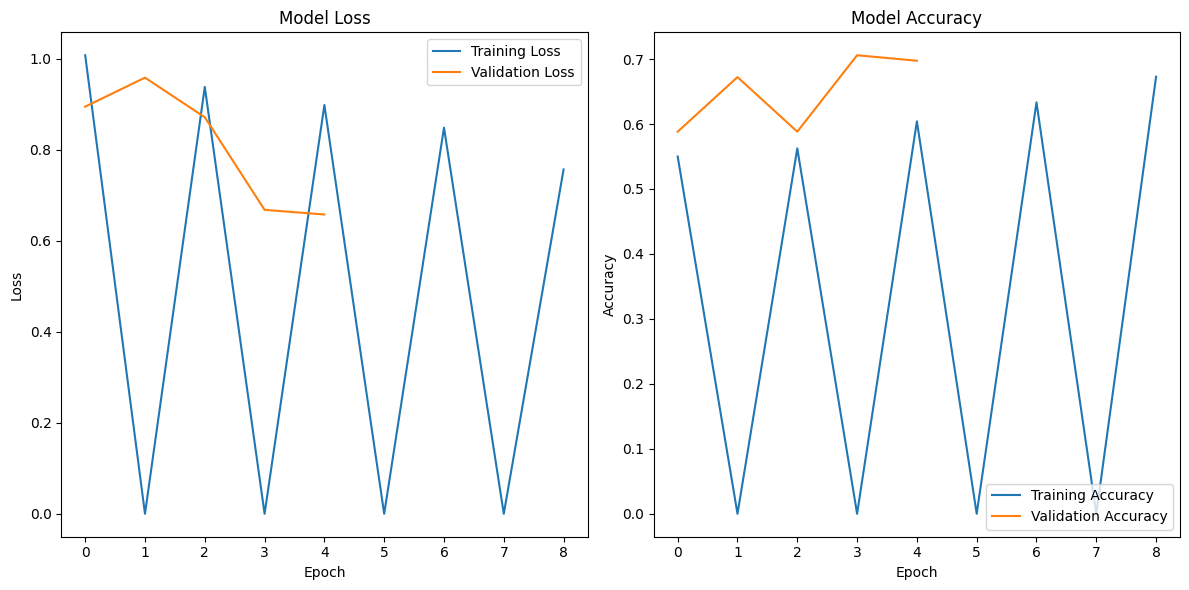

In [54]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('gesture_recognition_model.keras')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Optionally evaluate or train to build metrics
history = model.fit(
    train_generator,
    epochs=9,  # Adjust as necessary
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[batch_debugger]
)

# Save the model again in the Keras format if needed
model.save('gesture_recognition_model.keras')

# Plotting training & validation loss values
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()